In [2]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import json
import numpy as np

In [16]:
JSON_DIR = '/home/lcur0916/repo/PVD/output/pvd_test'
steps_dir = lambda step: os.path.join(JSON_DIR, f'{step}steps')

limits = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
steps = [15, 20, 25, 50, 100, 150, 250]


In [17]:

def get_step_results(step):
    all_au_pros = []
    all_curves = []

    paths = list(Path(steps_dir(step)).rglob('*.json'))
    if len(paths) == 0:
        raise FileNotFoundError('No json files found in the given directory')

    for path in paths:
        with open(path) as f:
            data = json.load(f)
        au_dict = list(data.values())[0]
        all_au_pros.append(au_dict['au_pro'])
        all_curves.append(au_dict['pro_curve'])

    mean_au_pro = np.mean(all_au_pros, axis=0)
    mean_au_pro = np.insert(mean_au_pro, 0, 0)
    mean_curve = np.mean(all_curves, axis=0)

    return mean_au_pro, mean_curve

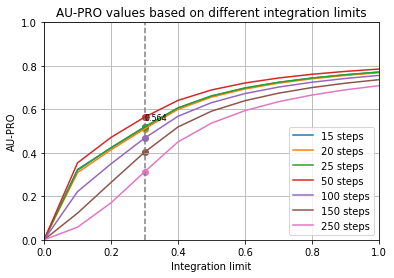

In [18]:

fig = plt.figure(figsize=(6, 4))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('Integration limit')
plt.ylabel('AU-PRO')
plt.title("AU-PRO values based on different integration limits", size=12)

# add dashed line in x=0.3, behind the curves
plt.axvline(x=0.3, color='grey', linestyle='--')

mean_au_pro_50 = None
for i, step in enumerate(steps):
    mean_au_pro, _ = get_step_results(step)
    if step == 50:
        mean_au_pro_50 = mean_au_pro

    # draw curves
    plt.plot(limits, mean_au_pro, label=f'{step} steps')

    # highlight the points in the curves in x=0.3, with the same colors as the curves before
    plt.scatter(0.3, mean_au_pro[3], color=f'C{i}')

# show the number for step50 at x=0.3 next to the point
plt.text(0.3, mean_au_pro_50[3], f'{mean_au_pro_50[3]:.3f}', fontsize=8, verticalalignment='center')

plt.grid()
plt.legend()

plt.savefig('au_pro_values_all_steps.jpg')
plt.show()